In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score
from matplotlib.lines import Line2D

from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

from sklearn.model_selection import StratifiedKFold, cross_val_score

WARNING : Don't re-run the Merge dataset, use the existing dataset Automobile_Final_2 or the sample will be duplicated

Original dataset used during modelling (9844 sample)

In [2]:
data_new = pd.read_csv('Automobile_Final_2.csv')

In [3]:
data_new

,name,mpg,cylinders,horsepower,model_year,origin
0,chevrolet chevelle malibu,18.0,8.0,130.0,1970,usa
1,buick skylark 320,15.0,8.0,165.0,1970,usa
2,plymouth satellite,18.0,8.0,150.0,1970,usa
3,amc rebel sst,16.0,8.0,150.0,1970,usa
4,ford torino,17.0,8.0,140.0,1970,usa
...,...,...,...,...,...,...
9839,Town Car,16.0,8.0,239.0,2011,usa
9840,Town Car,16.0,8.0,239.0,2011,usa
9841,Town Car,16.0,8.0,239.0,2011,usa
9842,Town Car,16.0,8.0,239.0,2011,usa


In [ ]:
Merge dataset 1 and 2 into single dataset

In [2]:
# Read the existing 'Automobile.csv' file into a DataFrame
data = pd.read_csv('Automobile_Final_1.csv')

# Read the new CSV file containing additional entries
new_data = pd.read_csv('data_2.csv')

# Define a mapping of manufacturers to their corresponding origin
manufacturer_to_origin = {
    #japan
    'Toyota': 'japan',
    'Subaru': 'japan',
    'Isuzu': 'japan',
    'Mitsubishi': 'japan',
    'Honda': 'japan',
    'Suzuki': 'japan',
    'Lexus': 'japan',
    'Infiniti': 'japan',
    'Acura': 'japan',
    'Mazda': 'japan',
    #europe
    'Volkswagen': 'europe',
    'Opel': 'europe',
    'BMW': 'europe',
    'Renault': 'europe',
    'Audi': 'europe',
    'Mercedes-Benz': 'europe',
    'Peugeot': 'europe',
    'Citroen': 'europe',
    'Skoda': 'europe',
    'Fiat': 'europe',
    'Volvo': 'europe',
    'Seat': 'europe',
    'Rover': 'europe',
    'Alfa Romeo': 'europe',
    'Land Rover': 'europe',
    'Iveco': 'europe',
    'Lancia': 'europe',
    'Mini': 'europe',
    'Porsche': 'europe',
    'Dacia': 'europe',
    'Jaguar': 'europe',
    'Buick': 'europe',
    #usa
    'Ford': 'usa',
    'Chevrolet': 'usa',
    'Chrysler': 'usa',
    'Dodge': 'usa',
    'Jeep': 'usa',
    'Cadillac': 'usa',
    'Pontiac': 'usa',
    'Lincoln': 'usa'
   
}

# Filter the new entries 
for manufacturer, origin in manufacturer_to_origin.items():
    manufacturer_entries = new_data[new_data['Make'].str.contains(manufacturer)] 
    manufacturer_entries = manufacturer_entries[['Model', 'Year', 'Engine HP', 'Engine Cylinders', 'city mpg']] #'displacement'
    
    # Rename the columns 
    manufacturer_entries.rename(columns={'Model': 'name', 'Year':'model_year', 'Engine Cylinders':'cylinders', 'Engine HP':'horsepower', 'city mpg':'mpg'}, inplace=True)
    
    # Assign the origin
    manufacturer_entries['origin'] = origin
    # Append to the existing DataFrame
    data = pd.concat([data, manufacturer_entries], ignore_index=True)

In [4]:
# Update
#data.to_csv('Automobile_Final_2.csv', index=False)

In [4]:
# Read
data = pd.read_csv('Automobile_Final_2.csv')

In [5]:
# check entry
df = pd.DataFrame(data)

grouped_origin = df.groupby('origin').size().reset_index(name='count')

print(grouped_origin)

   origin  count
0  europe   5526
1   japan   6523
2     usa   7377


Data Pre-processing

In [6]:
data.columns

Index(['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [7]:
# Drop the specified columns
data.drop(columns=['displacement', 'weight', 'acceleration'], inplace=True)

In [8]:
# Iterate through each column
for column in data.columns:
    # Filter NaN values in the column
    nan_values = data[column][data[column].isna()]
    
    # Display column name and corresponding NaN values
    print(f"NaN values in column '{column}':")
    print(nan_values)
    print()


NaN values in column 'name':
Series([], Name: name, dtype: object)

NaN values in column 'mpg':
Series([], Name: mpg, dtype: float64)

NaN values in column 'cylinders':
736     NaN
1469    NaN
1470    NaN
1471    NaN
3546    NaN
3547    NaN
3548    NaN
3549    NaN
3550    NaN
3551    NaN
3552    NaN
3553    NaN
3554    NaN
3555    NaN
3556    NaN
3557    NaN
3558    NaN
3559    NaN
3560    NaN
3561    NaN
3562    NaN
3563    NaN
3564    NaN
3565    NaN
3840    NaN
3841    NaN
3842    NaN
3843    NaN
7300    NaN
7301    NaN
10250   NaN
10983   NaN
10984   NaN
10985   NaN
13060   NaN
13061   NaN
13062   NaN
13063   NaN
13064   NaN
13065   NaN
13066   NaN
13067   NaN
13068   NaN
13069   NaN
13070   NaN
13071   NaN
13072   NaN
13073   NaN
13074   NaN
13075   NaN
13076   NaN
13077   NaN
13078   NaN
13079   NaN
13354   NaN
13355   NaN
13356   NaN
13357   NaN
16814   NaN
16815   NaN
Name: cylinders, dtype: float64

NaN values in column 'horsepower':
32      NaN
126     NaN
330     NaN
336    

In [9]:
# Drop rows with NaN values
data.dropna(inplace=True)

In [10]:
data.columns

Index(['name', 'mpg', 'cylinders', 'horsepower', 'model_year', 'origin'], dtype='object')

In [11]:
df = pd.DataFrame(data)

grouped_origin = df.groupby('origin').size().reset_index(name='count')

print(grouped_origin)

   origin  count
0  europe   5514
1   japan   6467
2     usa   7315


In [12]:
# Convert 'model_year' column to string
data['model_year'] = data['model_year'].astype(str)

# Update the 'model_year' column
data['model_year'] = data['model_year'].apply(lambda x: '19' + x if len(x) == 2 and int(x) < 83 else x)

print(data)

                            name   mpg  cylinders  horsepower model_year  \
0      chevrolet chevelle malibu  18.0        8.0       130.0       1970   
1              buick skylark 320  15.0        8.0       165.0       1970   
2             plymouth satellite  18.0        8.0       150.0       1970   
3                  amc rebel sst  16.0        8.0       150.0       1970   
4                    ford torino  17.0        8.0       140.0       1970   
...                          ...   ...        ...         ...        ...   
19421                   Town Car  16.0        8.0       239.0       2011   
19422                   Town Car  16.0        8.0       239.0       2011   
19423                   Town Car  16.0        8.0       239.0       2011   
19424                   Town Car  16.0        8.0       239.0       2011   
19425                     Zephyr  17.0        6.0       221.0       2006   

      origin  
0        usa  
1        usa  
2        usa  
3        usa  
4        usa

In [14]:
# Remove duplicate rows
data_new_1 = data_new.drop_duplicates()

# Optionally, you can reset the index after dropping duplicates
data_new_1.reset_index(drop=True, inplace=True)

In [17]:
# Insiden re-run (duplicated data)
# Example 4 Runner count = 44, due re-run become 88, the accuracy in journal was when the dataset still single not duplicated
duplicated_rows = data[data.duplicated()]
print(duplicated_rows)

           name   mpg  cylinders  horsepower model_year origin
399     4Runner  17.0        6.0       270.0       2014  japan
400     4Runner  17.0        6.0       270.0       2014  japan
401     4Runner  17.0        6.0       270.0       2014  japan
402     4Runner  17.0        6.0       270.0       2014  japan
403     4Runner  17.0        6.0       270.0       2014  japan
...         ...   ...        ...         ...        ...    ...
19421  Town Car  16.0        8.0       239.0       2011    usa
19422  Town Car  16.0        8.0       239.0       2011    usa
19423  Town Car  16.0        8.0       239.0       2011    usa
19424  Town Car  16.0        8.0       239.0       2011    usa
19425    Zephyr  17.0        6.0       221.0       2006    usa

[15167 rows x 6 columns]


In [19]:
data_new

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70,usa
1,buick skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5,70,usa
2,plymouth satellite,18.0,8.0,318.0,150.0,3436.0,11.0,70,usa
3,amc rebel sst,16.0,8.0,304.0,150.0,3433.0,12.0,70,usa
4,ford torino,17.0,8.0,302.0,140.0,3449.0,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
19421,Town Car,16.0,8.0,NaN,239.0,NaN,NaN,2011,usa
19422,Town Car,16.0,8.0,NaN,239.0,NaN,NaN,2011,usa
19423,Town Car,16.0,8.0,NaN,239.0,NaN,NaN,2011,usa
19424,Town Car,16.0,8.0,NaN,239.0,NaN,NaN,2011,usa


In [20]:
# Update
data.to_csv('Automobile_Final_2.csv', index=False)

Process learning

In [16]:
data_new = pd.read_csv('Automobile_Final_2.csv')

In [17]:
print("Features:")
print(data_new.columns.tolist())

Features:
['name', 'mpg', 'cylinders', 'horsepower', 'model_year', 'origin']


Penjelasan entry dalam grafik

In [18]:
average_mpg_by_origin = data_new.groupby('origin')['mpg'].mean()

print(average_mpg_by_origin)

origin
europe    20.154334
japan     21.262347
usa       17.828325
Name: mpg, dtype: float64


Percentage of based each origin in dataset

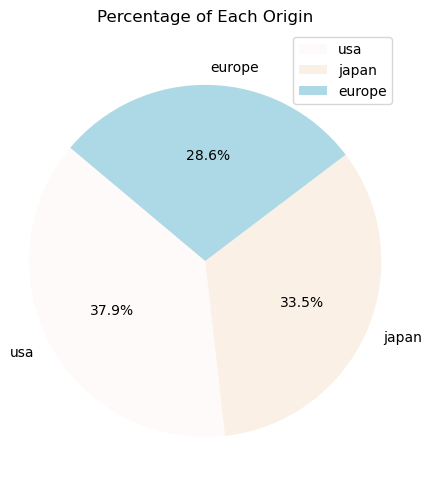

In [19]:
origin_percentage = data_new['origin'].value_counts(normalize=True) * 100

colors = {'usa': 'snow', 'japan': 'linen', 'europe': 'lightblue'}

plt.figure(figsize=(5, 6))
plt.pie(origin_percentage, labels=origin_percentage.index, autopct='%1.1f%%', startangle=140, colors=[colors[origin] for origin in origin_percentage.index])
plt.title('Percentage of Each Origin')
plt.axis('equal') 
plt.savefig('origin_percentage_chart.jpg')
plt.legend()
plt.show()

Average MPG by each origin value

In [49]:
average_mpg_by_origin = data_new.groupby('origin')['mpg'].mean()

print(average_mpg_by_origin)

origin
europe    20.154334
japan     21.262347
usa       17.828325
Name: mpg, dtype: float64


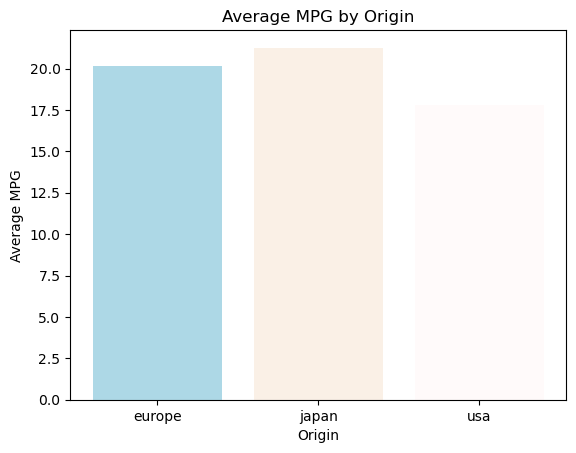

In [51]:
colors = {'usa': 'snow', 'japan': 'linen', 'europe': 'lightblue'}

plt.bar(average_mpg_by_origin.index, average_mpg_by_origin.values, color=[colors[origin] for origin in average_mpg_by_origin.index])

plt.xlabel('Origin')
plt.ylabel('Average MPG')
plt.title('Average MPG by Origin')
plt.savefig('origin_mpg_char_u.jpg')

plt.show()

Distribusi nilai model_year

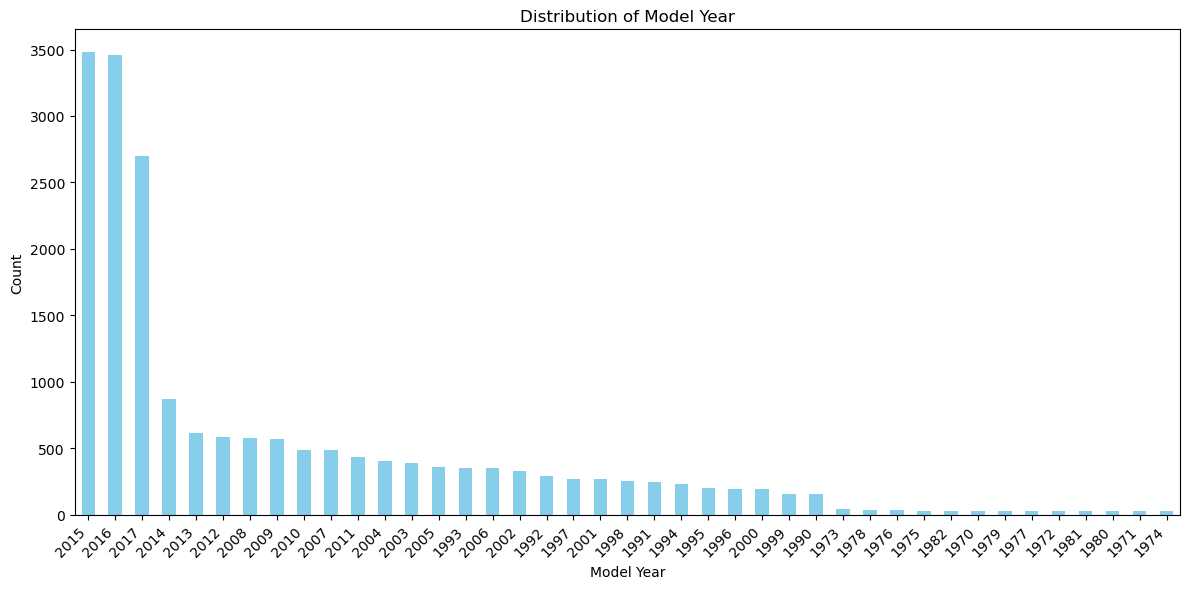

In [53]:
model_year_counts = data_new['model_year'].value_counts()

plt.figure(figsize=(12, 6))
model_year_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.savefig('Distribution_model_year_char_u.jpg')
# Show plot
plt.show()

In [54]:
#missing value

data_new.interpolate(method = 'linear', limit=1)

nan_columns = data_new.columns[data_new.isna().any()].tolist()

if nan_columns:
    print("NaN values found in the following columns:")
    print(nan_columns)
else:
    print("No NaN values found in the DataFrame.")

data_new

No NaN values found in the DataFrame.


C:\Users\dzkje\AppData\Local\Temp\ipykernel_11188\3373537816.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_new.interpolate(method = 'linear', limit=1)


,name,mpg,cylinders,horsepower,model_year,origin
0,chevrolet chevelle malibu,18.0,8.0,130.0,1970,usa
1,buick skylark 320,15.0,8.0,165.0,1970,usa
2,plymouth satellite,18.0,8.0,150.0,1970,usa
3,amc rebel sst,16.0,8.0,150.0,1970,usa
4,ford torino,17.0,8.0,140.0,1970,usa
...,...,...,...,...,...,...
19291,Town Car,16.0,8.0,239.0,2011,usa
19292,Town Car,16.0,8.0,239.0,2011,usa
19293,Town Car,16.0,8.0,239.0,2011,usa
19294,Town Car,16.0,8.0,239.0,2011,usa


New data based on feature origin

If value of 'Worth' = 0 then False or not worth it, else 'Worth' = 1 then True or it is worth it

Gaussian Naive Bayes 

Origin based usa

In [55]:
usa_count = data_new['origin'].value_counts().get('usa', 0)
print("Number of occurrences where origin is 'usa':", usa_count)

Number of occurrences where origin is 'usa': 7315


Check anomaly entry

In [56]:
high_mpg_data = data_new[data_new['mpg'] > 100]
print(high_mpg_data)

           name    mpg  cylinders  horsepower  model_year  origin
4615         i3  137.0        0.0       170.0        2015  europe
4616         i3  137.0        0.0       170.0        2016  europe
4617         i3  137.0        0.0       170.0        2017  europe
4618         i3  129.0        0.0       170.0        2017  europe
8054   Spark EV  128.0        0.0       140.0        2014     usa
8055   Spark EV  128.0        0.0       140.0        2014     usa
8056   Spark EV  128.0        0.0       140.0        2015     usa
8057   Spark EV  128.0        0.0       140.0        2015     usa
8058   Spark EV  128.0        0.0       140.0        2016     usa
8059   Spark EV  128.0        0.0       140.0        2016     usa
14067        i3  137.0        0.0       170.0        2015  europe
14068        i3  137.0        0.0       170.0        2016  europe
14069        i3  137.0        0.0       170.0        2017  europe
14070        i3  129.0        0.0       170.0        2017  europe
17506  Spa

Start Gaussian Naive Bayes Learning

In [58]:
usa_data1 = data_new[data_new['origin'] == 'usa']

def calculate_worth1(row):
    if row['cylinders'] <= 4 and row['horsepower'] <= 160  and row['horsepower'] > row['mpg'] :
        return 0
    else:
        return 1

usa_data1['worth'] = usa_data1.apply(calculate_worth1, axis=1)
        
X1 = usa_data1[['mpg', 'horsepower']]
y1 = usa_data1['worth']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.4, random_state=42)

gnb = GaussianNB()

gnb.fit(X_train1, y_train1)

y_pred1 = gnb.predict(X_test1)

accuracy1 = accuracy_score(y_test1, y_pred1)
print("GNB (usa) Accuracy:", accuracy1)

report = classification_report(y_test1, y_pred1)

print("Classification Report:")
print(report)

GNB (usa) Accuracy: 0.9504442925495558
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.81       429
           1       0.96      0.99      0.97      2497

    accuracy                           0.95      2926
   macro avg       0.93      0.86      0.89      2926
weighted avg       0.95      0.95      0.95      2926



C:\Users\dzkje\AppData\Local\Temp\ipykernel_11188\3915030621.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data1['worth'] = usa_data1.apply(calculate_worth1, axis=1)


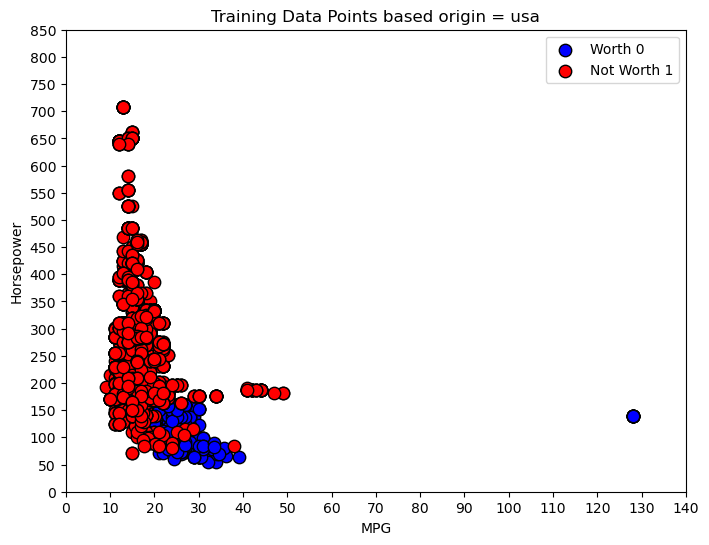

In [59]:
plt.figure(figsize=(8, 6))

plt.scatter(X_train1.loc[y_train1 == 0, 'mpg'], X_train1.loc[y_train1 == 0, 'horsepower'], label='Worth 0', color='blue', edgecolor='k', s=80)
plt.scatter(X_train1.loc[y_train1 == 1, 'mpg'], X_train1.loc[y_train1 == 1, 'horsepower'], label='Not Worth 1', color='red', edgecolor='k', s=80)

plt.xlabel('MPG')
plt.ylabel('Horsepower')
plt.title('Training Data Points based origin = usa')
#plt.colorbar(label='Worth')
plt.xticks(np.arange(0, 150, 10)) 
plt.yticks(np.arange(0, 900, 50))
plt.legend() 
plt.show()

 Display worth = 0 (usa)

In [61]:
worth_0_data = usa_data1[(usa_data1['worth'] == 0) & (usa_data1['model_year'] > 2010)]
count_by_name_and_horsepower = worth_0_data.groupby(['name', 'horsepower', 'model_year']).size().reset_index(name='count')

count_by_name_and_horsepower_unique = count_by_name_and_horsepower.drop_duplicates(subset=['name', 'horsepower', 'model_year'])

count_by_name_and_horsepower_sorted = count_by_name_and_horsepower_unique.sort_values(by='count', ascending=False)

top_15_cars = count_by_name_and_horsepower_sorted.head(15)

print(top_15_cars)

             name  horsepower  model_year  count
25          Sonic       138.0        2015     32
26          Sonic       138.0        2016     28
27          Sonic       138.0        2017     20
6           Cruze       138.0        2015     18
9           Cruze       153.0        2017     18
10  Cruze Limited       138.0        2016     18
35           Trax       138.0        2016     16
34           Trax       138.0        2015     16
0            Aveo       108.0        2011     12
15         Fiesta       120.0        2016     12
30          Spark        98.0        2017     12
29          Spark        98.0        2016     12
28          Spark        84.0        2015     12
20          Focus       160.0        2017     12
16         Fiesta       120.0        2017     12


Confusion Matrix

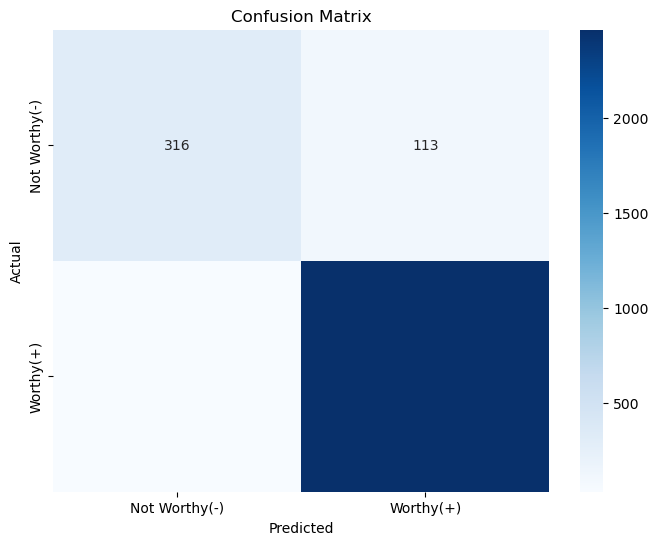

In [62]:
cm = confusion_matrix(y_test1, y_pred1)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Not Worthy(-)', 'Worthy(+)'], 
            yticklabels=['Not Worthy(-)', 'Worthy(+)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ROC Curve (Model Validation)

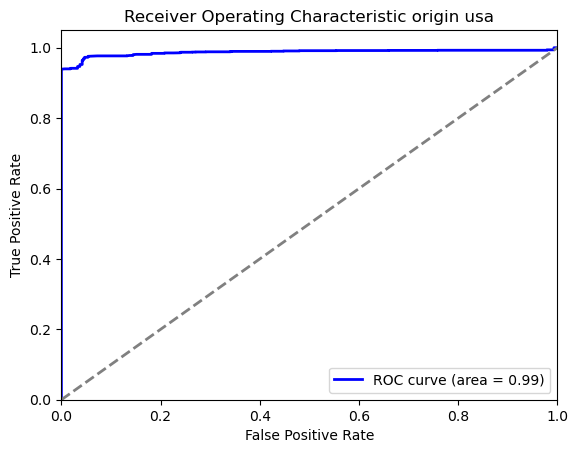

In [63]:
y_probs = gnb.predict_proba(X_test1)[:, 1]

fpr, tpr, _ = roc_curve(y_test1, y_probs)
roc_auc = roc_auc_score(y_test1, y_probs)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic origin usa')
plt.legend(loc='lower right')
plt.show()

Origin based japan

In [64]:
jpn_data = data_new[data_new['origin'] == 'japan']

def calculate_worth2(row):
    if row['cylinders'] <= 4 and row['horsepower'] < 120 and row['horsepower'] > row['mpg']:
        return 1
    else:
        return 0

jpn_data.loc[:, 'worth'] = jpn_data.apply(calculate_worth2, axis=1)

X2 = jpn_data[['mpg', 'horsepower']]
y2 = jpn_data['worth']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.4, random_state=42)

gnb = GaussianNB()

gnb.fit(X_train2, y_train2)

y_pred2 = gnb.predict(X_test2)

accuracy2 = accuracy_score(y_test2, y_pred2)
print("GNB (japan) Accuracy:", accuracy2)

report = classification_report(y_test2, y_pred2)

print("Classification Report:")
print(report)

GNB (japan) Accuracy: 0.9632779281020487
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2359
           1       0.87      0.68      0.77       228

    accuracy                           0.96      2587
   macro avg       0.92      0.84      0.87      2587
weighted avg       0.96      0.96      0.96      2587



C:\Users\dzkje\AppData\Local\Temp\ipykernel_11188\2080175094.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpn_data.loc[:, 'worth'] = jpn_data.apply(calculate_worth2, axis=1)


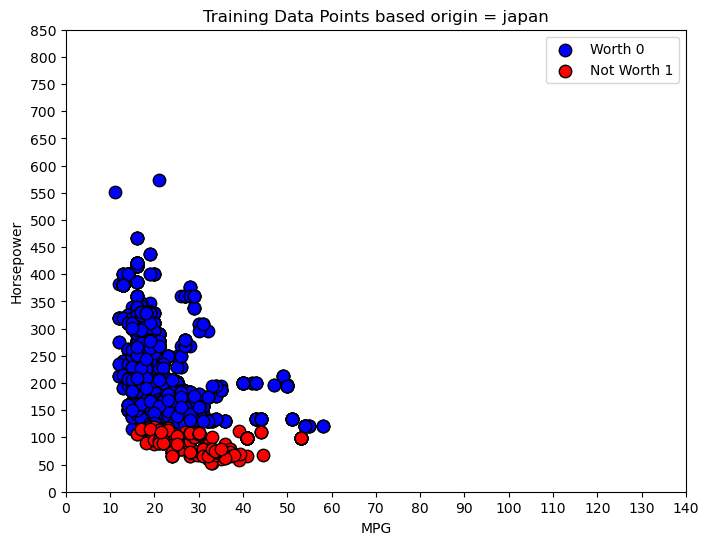

In [65]:
plt.figure(figsize=(8, 6))

plt.scatter(X_train2.loc[y_train2 == 0, 'mpg'], X_train2.loc[y_train2 == 0, 'horsepower'], label='Worth 0', color='blue', edgecolor='k', s=80)
plt.scatter(X_train2.loc[y_train2 == 1, 'mpg'], X_train2.loc[y_train2 == 1, 'horsepower'], label='Not Worth 1', color='red', edgecolor='k', s=80)

plt.xlabel('MPG')
plt.ylabel('Horsepower')
plt.title('Training Data Points based origin = japan')
#plt.colorbar(label='Worth')
plt.xticks(np.arange(0, 150, 10)) 
plt.yticks(np.arange(0, 900, 50))
plt.legend() 
plt.show()

Confusion Matrix

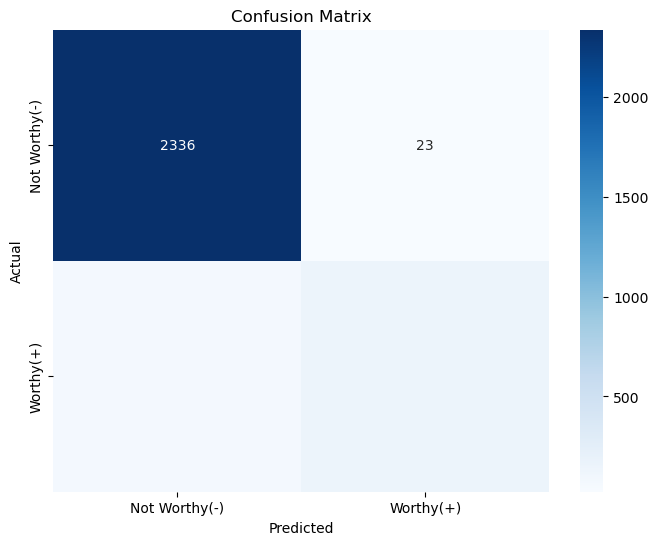

In [66]:
cm = confusion_matrix(y_test2, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Not Worthy(-)', 'Worthy(+)'], 
            yticklabels=['Not Worthy(-)', 'Worthy(+)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [91]:
worth_0_data = jpn_data[(jpn_data['worth'] == 0) & (jpn_data['model_year'] > 2010)]
count_by_name_and_horsepower = worth_0_data.groupby(['name', 'horsepower', 'model_year']).size().reset_index(name='count')

count_by_name_and_horsepower_unique = count_by_name_and_horsepower.drop_duplicates(subset=['name', 'horsepower', 'model_year'])

count_by_name_and_horsepower_sorted = count_by_name_and_horsepower_unique.sort_values(by='count', ascending=False)

top_15_cars = count_by_name_and_horsepower_sorted.head(15)

print(top_15_cars)

       name  horsepower  model_year  count
449  Tundra       381.0        2016     88
450  Tundra       381.0        2017     88
448  Tundra       381.0        2015     68
439  Tacoma       278.0        2017     50
438  Tacoma       278.0        2016     44
311   Pilot       280.0        2016     34
410  Sienna       266.0        2015     34
411  Sienna       266.0        2016     34
412  Sienna       296.0        2017     34
312   Pilot       280.0        2017     34
18   Accord       185.0        2016     32
267     MDX       290.0        2016     32
19   Accord       185.0        2017     32
78    Civic       174.0        2017     30
310   Pilot       250.0        2015     28


ROC (validation)

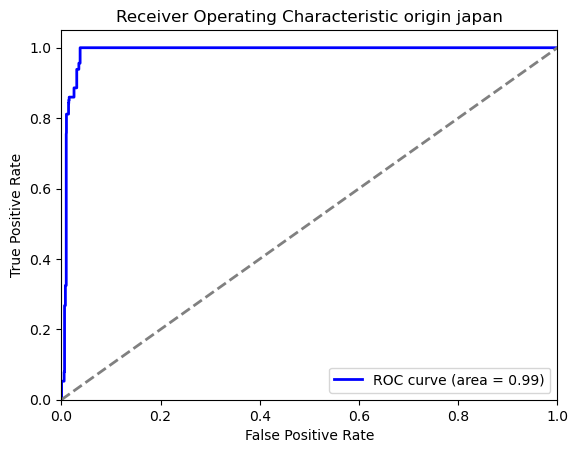

In [68]:
y_probs = gnb.predict_proba(X_test2)[:, 1]

fpr, tpr, _ = roc_curve(y_test2, y_probs)
roc_auc = roc_auc_score(y_test2, y_probs)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic origin japan')
plt.legend(loc='lower right')
plt.show()

Origin based europe

In [69]:
eu_data = data_new[data_new['origin'] == 'europe']

def calculate_worth3(row):
    if row['cylinders'] < 5 and row['horsepower'] < 140 and row['horsepower'] > row['mpg']:
        return 1
    else:
        return 0

eu_data['worth'] = eu_data.apply(calculate_worth3, axis=1)

X3 = eu_data[['mpg', 'horsepower']]
y3 = eu_data['worth']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.4, random_state=42)

gnb = GaussianNB()

gnb.fit(X_train3, y_train3)

y_pred3 = gnb.predict(X_test3)

accuracy3 = accuracy_score(y_test3, y_pred3)
print("GNB (europe) Accuracy:", accuracy3)

report = classification_report(y_test3, y_pred3)

print("Classification Report:")
print(report)

GNB (europe) Accuracy: 0.958295557570263
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2111
           1       1.00      0.03      0.06        95

    accuracy                           0.96      2206
   macro avg       0.98      0.52      0.52      2206
weighted avg       0.96      0.96      0.94      2206



C:\Users\dzkje\AppData\Local\Temp\ipykernel_11188\3565777050.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_data['worth'] = eu_data.apply(calculate_worth3, axis=1)


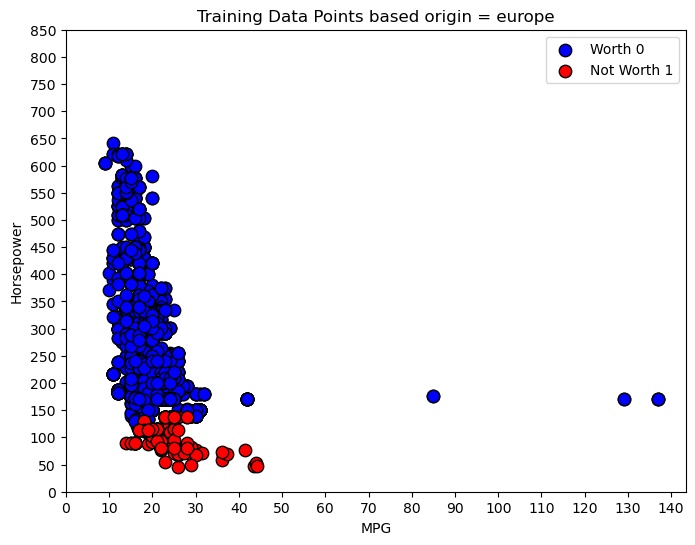

In [70]:
plt.figure(figsize=(8, 6))

plt.scatter(X_train3.loc[y_train3 == 0, 'mpg'], X_train3.loc[y_train3 == 0, 'horsepower'], label='Worth 0', color='blue', edgecolor='k', s=80)
plt.scatter(X_train3.loc[y_train3 == 1, 'mpg'], X_train3.loc[y_train3 == 1, 'horsepower'], label='Not Worth 1', color='red', edgecolor='k', s=80)

plt.xlabel('MPG')
plt.ylabel('Horsepower')
plt.title('Training Data Points based origin = europe')
#plt.colorbar(label='Worth')
plt.xticks(np.arange(0, 150, 10)) 
plt.yticks(np.arange(0, 900, 50))
plt.legend() 
plt.show()

Confusion Matrix

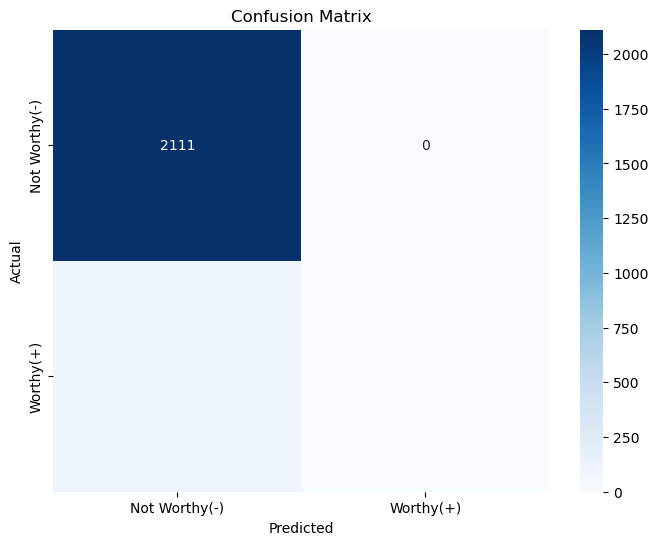

In [71]:
cm = confusion_matrix(y_test3, y_pred3)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Not Worthy(-)', 'Worthy(+)'], 
            yticklabels=['Not Worthy(-)', 'Worthy(+)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [92]:
worth_0_data = eu_data[eu_data['worth'] == 0]
#print(worth_0_data[['name','cylinders', 'horsepower', 'model_year', 'mpg']])
count_by_name_and_horsepower = worth_0_data.groupby(['name', 'horsepower','model_year',]).size().reset_index(name='count')

print(count_by_name_and_horsepower)

count_by_name_and_horsepower_sorted = count_by_name_and_horsepower.sort_values(by='model_year', ascending=False)

print(count_by_name_and_horsepower_sorted)

                   name  horsepower  model_year  count
0              1 Series       230.0        2011      4
1              1 Series       230.0        2012      4
2              1 Series       230.0        2013      8
3              1 Series       300.0        2011      4
4              1 Series       300.0        2012      4
..                  ...         ...         ...    ...
954  mercedes benz 300d        77.0        1979      1
955  mercedes-benz 280s       120.0        1976      1
956       peugeot 604sl       133.0        1978      1
957         volvo 264gl       125.0        1978      1
958        volvo diesel        76.0        1981      1

[959 rows x 4 columns]
                   name  horsepower  model_year  count
887                X5 M       567.0        2017      2
890                  X6       300.0        2017      4
112            7 Series       320.0        2017      4
589              Passat       170.0        2017     10
554       M6 Gran Coupe       560.0      

In [73]:
worth_0_data = eu_data[(eu_data['worth'] == 0) & (eu_data['model_year'] > 2010)]
count_by_name_and_horsepower = worth_0_data.groupby(['name', 'horsepower', 'model_year']).size().reset_index(name='count')

count_by_name_and_horsepower_unique = count_by_name_and_horsepower.drop_duplicates(subset=['name', 'horsepower', 'model_year'])

count_by_name_and_horsepower_sorted = count_by_name_and_horsepower_unique.sort_values(by='count', ascending=False)

top_15_cars = count_by_name_and_horsepower_sorted.head(15)

print(top_15_cars)

                   name  horsepower  model_year  count
325                 GTI       200.0        2013     80
324                 GTI       200.0        2012     64
482  Range Rover Evoque       240.0        2015     52
478         Range Rover       510.0        2014     44
151              Beetle       170.0        2015     42
356           Jetta GLI       210.0        2014     40
163  Beetle Convertible       210.0        2015     40
154              Beetle       210.0        2015     40
428              Passat       170.0        2015     36
484  Range Rover Evoque       240.0        2017     32
429              Passat       170.0        2016     28
479         Range Rover       510.0        2015     28
195                  CC       200.0        2016     28
483  Range Rover Evoque       240.0        2016     28
159  Beetle Convertible       170.0        2014     26


ROC (Validation)

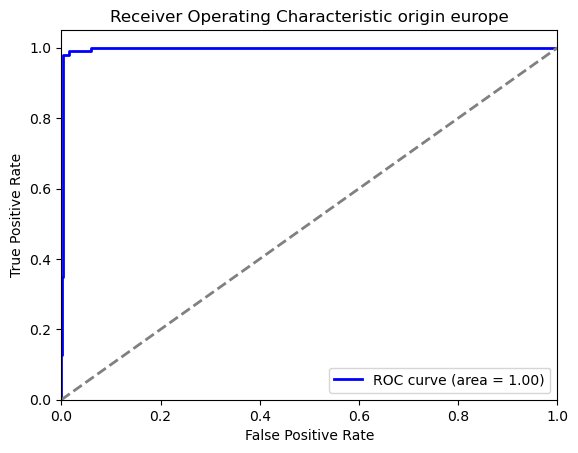

In [74]:
y_probs = gnb.predict_proba(X_test3)[:, 1]

fpr, tpr, _ = roc_curve(y_test3, y_probs)
roc_auc = roc_auc_score(y_test3, y_probs)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic origin europe')
plt.legend(loc='lower right')
plt.show()

In [75]:
eu_count = data_new['origin'].value_counts().get('europe', 0)
print("Number of occurrences where origin is 'Europe':", eu_count)

Number of occurrences where origin is 'Europe': 5514


Bernouli based usa

In [3]:
usa_data1 = data_new[data_new['origin'] == 'usa']

def calculate_worth1(row):
    if row['cylinders'] <= 4 and row['horsepower'] <= 160  and row['horsepower'] > row['mpg'] :
        return 0
    else:
        return 1

usa_data1['worth'] = usa_data1.apply(calculate_worth1, axis=1)
        
X1 = usa_data1[['mpg', 'horsepower']]
y1 = usa_data1['worth']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.4, random_state=42)

bnb = BernoulliNB()

bnb.fit(X_train1, y_train1)

y_pred1 = bnb.predict(X_test1)

accuracy1 = accuracy_score(y_test1, y_pred1)
print("BNB (usa) Accuracy:", accuracy1)

report = classification_report(y_test1, y_pred1)

print("Classification Report:")
print(report)

BNB (usa) Accuracy: 0.8505291005291006
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       226
           1       0.85      1.00      0.92      1286

    accuracy                           0.85      1512
   macro avg       0.43      0.50      0.46      1512
weighted avg       0.72      0.85      0.78      1512



C:\Users\dzkje\AppData\Local\Temp\ipykernel_10664\1770466434.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data1['worth'] = usa_data1.apply(calculate_worth1, axis=1)
C:\Users\dzkje\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dzkje\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

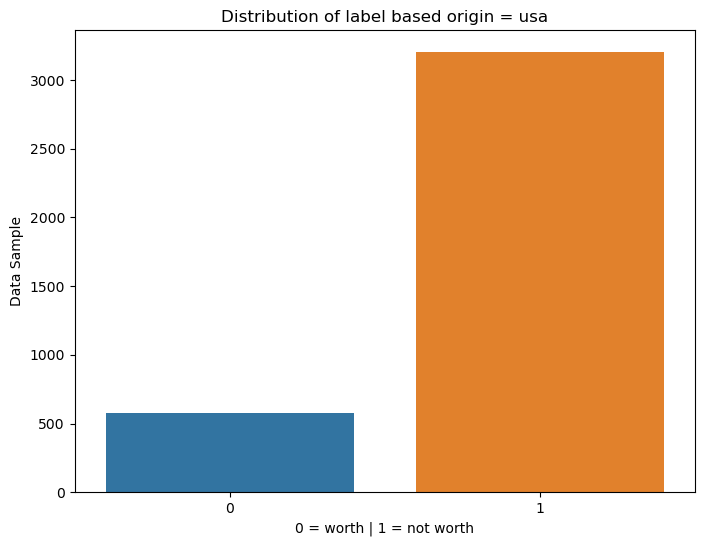

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x='worth', data=usa_data1)
plt.xlabel('0 = worth | 1 = not worth')
plt.ylabel('Data Sample')
plt.title('Distribution of label based origin = usa')
plt.savefig('Distribution_label_based_origin = usa.jpg')
plt.show()

Bernouli based japan

In [6]:
jpn_data = data_new[data_new['origin'] == 'japan']

def calculate_worth2(row):
    if row['cylinders'] <= 4 and row['horsepower'] < 120 and row['horsepower'] > row['mpg']:
        return 1
    else:
        return 0

jpn_data.loc[:, 'worth'] = jpn_data.apply(calculate_worth2, axis=1)

X2 = jpn_data[['mpg', 'horsepower']]
y2 = jpn_data['worth']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.4, random_state=42)

bnb = BernoulliNB()

bnb.fit(X_train2, y_train2)

y_pred2 = bnb.predict(X_test2)

accuracy2 = accuracy_score(y_test2, y_pred2)
print("BNB (japan) Accuracy:", accuracy2)

report = classification_report(y_test2, y_pred2)

print("Classification Report:")
print(report)

BNB (japan) Accuracy: 0.9061068702290076
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1187
           1       0.00      0.00      0.00       123

    accuracy                           0.91      1310
   macro avg       0.45      0.50      0.48      1310
weighted avg       0.82      0.91      0.86      1310



C:\Users\dzkje\AppData\Local\Temp\ipykernel_10664\2393937589.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpn_data.loc[:, 'worth'] = jpn_data.apply(calculate_worth2, axis=1)
C:\Users\dzkje\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dzkje\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


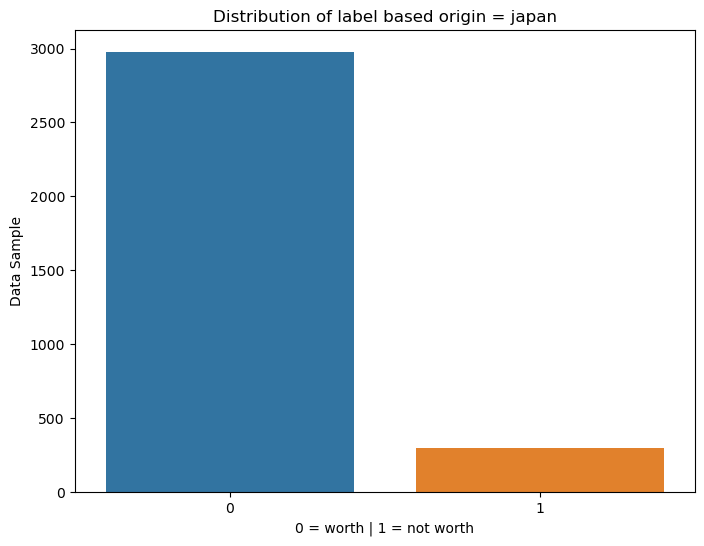

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='worth', data=jpn_data)
plt.xlabel('0 = worth | 1 = not worth')
plt.ylabel('Data Sample')
plt.title('Distribution of label based origin = japan')
plt.savefig('Distribution_label_based_origin = japan.jpg')
plt.show()


Bernouli based europe

In [8]:
eu_data = data_new[data_new['origin'] == 'europe']

def calculate_worth3(row):
    if row['cylinders'] < 5 and row['horsepower'] < 140 and row['horsepower'] > row['mpg']:
        return 1
    else:
        return 0

eu_data['worth'] = eu_data.apply(calculate_worth3, axis=1)

X3 = eu_data[['mpg', 'horsepower']]
y3 = eu_data['worth']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.4, random_state=42)

bnb = BernoulliNB()

bnb.fit(X_train3, y_train3)

y_pred3 = bnb.predict(X_test3)

accuracy3 = accuracy_score(y_test3, y_pred3)
print("BNB (europe) Accuracy:", accuracy3)

report = classification_report(y_test3, y_pred3)

print("Classification Report:")
print(report)

BNB (europe) Accuracy: 0.9507609668755596
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1062
           1       0.00      0.00      0.00        55

    accuracy                           0.95      1117
   macro avg       0.48      0.50      0.49      1117
weighted avg       0.90      0.95      0.93      1117



C:\Users\dzkje\AppData\Local\Temp\ipykernel_10664\1964913161.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_data['worth'] = eu_data.apply(calculate_worth3, axis=1)
C:\Users\dzkje\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dzkje\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p

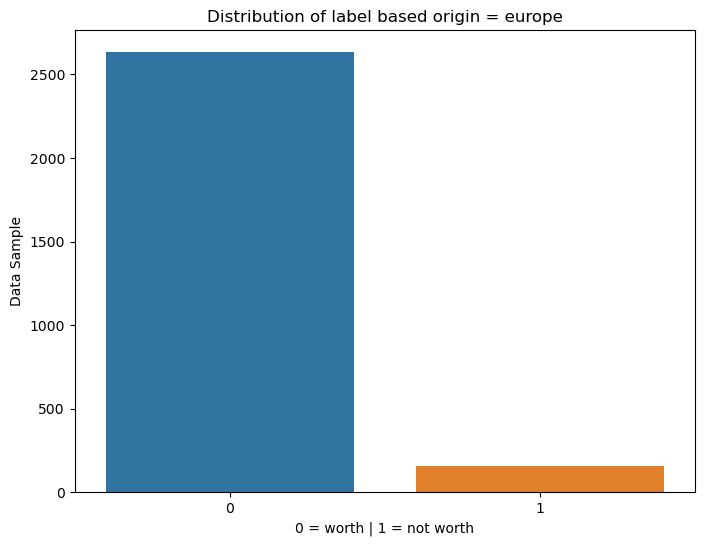

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='worth', data=eu_data)
plt.xlabel('0 = worth | 1 = not worth')
plt.ylabel('Data Sample')
plt.title('Distribution of label based origin = europe')
plt.savefig('Distribution_label_based_origin = europe.jpg')
plt.show()

Support Vector Machine

Origin based usa

In [83]:
usa_data1 = data_new[data_new['origin'] == 'usa']

def calculate_worth1(row):
    if row['cylinders'] <= 4 and row['horsepower'] <= 160  and row['horsepower'] > row['mpg'] :
        return 0
    else:
        return 1

usa_data1['worth'] = usa_data1.apply(calculate_worth1, axis=1)
        
X1 = usa_data1[['mpg', 'horsepower']]
y1 = usa_data1['worth']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.4, random_state=42)

svm_classifier = SVC(kernel='linear') 

svm_classifier.fit(X_train1, y_train1)

y_pred1 = svm_classifier.predict(X_test1)

accuracy1 = accuracy_score(y_test1, y_pred1)
print("SVM (usa) Accuracy:", accuracy1)

report = classification_report(y_test1, y_pred1)

print("Classification Report:")
print(report)

C:\Users\dzkje\AppData\Local\Temp\ipykernel_11188\3393554107.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data1['worth'] = usa_data1.apply(calculate_worth1, axis=1)


SVM (usa) Accuracy: 0.963773069036227
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       429
           1       0.98      0.97      0.98      2497

    accuracy                           0.96      2926
   macro avg       0.92      0.94      0.93      2926
weighted avg       0.96      0.96      0.96      2926



In [ ]:
y_pred1 = svm_classifier.predict(X_test1)

x_min, x_max = X1.iloc[:, 0].min() - 1, X1.iloc[:, 0].max() + 1
y_min, y_max = X1.iloc[:, 1].min() - 1, X1.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

plt.scatter(X1[y1 == 0].iloc[:, 0], X1[y1 == 0].iloc[:, 1], c='red', s=20, edgecolor='k', label=' worth 0')
plt.scatter(X1[y1 == 1].iloc[:, 0], X1[y1 == 1].iloc[:, 1], c='blue', s=20, edgecolor='k', label='Not Worth 1')

plt.xlabel('MPG')
plt.ylabel('Horsepower')
plt.title('SVM Decision Boundary on usa')
plt.legend()
plt.show()

C:\Users\dzkje\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
X1 = eu_data[['mpg', 'horsepower','cylinders']].values
y1 = eu_data['worth'].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.4, random_state=42)

svm_classifier = SVC(kernel='linear') 

svm_classifier.fit(X_train1, y_train1)

support_vectors = svm_classifier.support_vectors_

fig = plt.figure(figsize=(12, 16))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(support_vectors[:, 0], support_vectors[:, 1], support_vectors[:, 2], s=100, c='red', marker='o', label='Support Vectors')

xx, yy = np.meshgrid(np.linspace(X1[:, 0].min() - 1, X1[:, 0].max() + 1, 50),
                     np.linspace(X1[:, 1].min() - 1, X1[:, 1].max() + 1, 50))
zz = (-svm_classifier.intercept_[0] - svm_classifier.coef_[0, 0] * xx - svm_classifier.coef_[0, 1] * yy) / svm_classifier.coef_[0, 2]
ax.plot_surface(xx, yy, zz, alpha=0.5)

old_min = -30
old_max = 10
new_min = 2
new_max = 8

S = (new_max - new_min) / (old_max - old_min)

Z1_scaled_not_worth = [S * z + new_min for z in X1[y1 == 0, 2]]  # Z values for "Not Worth 0" class
Z1_scaled_worth = [S * z + new_min for z in X1[y1 == 1, 2]]      # Z values for "Worth 1" class

# Plot the data points for each class with scaled Z values
ax.scatter(X1[y1 == 0, 0], X1[y1 == 0, 1], Z1_scaled_not_worth, c='blue', cmap=plt.cm.coolwarm, label='Worth 0')
ax.scatter(X1[y1 == 1, 0], X1[y1 == 1, 1], Z1_scaled_worth, c='green', cmap=plt.cm.coolwarm, label='Not Worth 1')

ax.set_xlabel('MPG')
ax.set_ylabel('Horsepower')
#ax.set_zlabel('Cylinders')
ax.set_title('SVM Decision Boundary in 3D on Europe')

plt.legend()
plt.show()

Origin based japan

In [89]:
jpn_data = data_new[data_new['origin'] == 'japan']

def calculate_worth2(row):
    if row['cylinders'] <= 4 and row['horsepower'] < 120 and row['horsepower'] > row['mpg']:
        return 1
    else:
        return 0

jpn_data.loc[:, 'worth'] = jpn_data.apply(calculate_worth2, axis=1)

X2 = jpn_data[['mpg', 'horsepower']]
y2 = jpn_data['worth']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.4, random_state=42)

svm_classifier = SVC(kernel='linear') 

svm_classifier.fit(X_train2, y_train2)

y_pred2 = svm_classifier.predict(X_test2)

accuracy2 = accuracy_score(y_test2, y_pred2)
print("SVM (japan) Accuracy:", accuracy2)

report = classification_report(y_test2, y_pred2)

print("Classification Report:")
print(report)

SVM (japan) Accuracy: 0.9965210668728257
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2359
           1       0.96      1.00      0.98       228

    accuracy                           1.00      2587
   macro avg       0.98      1.00      0.99      2587
weighted avg       1.00      1.00      1.00      2587



C:\Users\dzkje\AppData\Local\Temp\ipykernel_11188\780582745.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpn_data.loc[:, 'worth'] = jpn_data.apply(calculate_worth2, axis=1)


In [ ]:
y_pred2 = svm_classifier.predict(X_test2)

x_min, x_max = X2.iloc[:, 0].min() - 1, X2.iloc[:, 0].max() + 1
y_min, y_max = X2.iloc[:, 1].min() - 1, X2.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

plt.scatter(X2[y2 == 0].iloc[:, 0], X2[y2 == 0].iloc[:, 1], c='red', s=20, edgecolor='k', label='Worth 0')
plt.scatter(X2[y2 == 1].iloc[:, 0], X2[y2 == 1].iloc[:, 1], c='blue', s=20, edgecolor='k', label='Not Worth 1')

plt.xlabel('MPG')
plt.ylabel('Horsepower')
plt.title('SVM Decision Boundary on Japan')
plt.legend()
plt.show()

In [ ]:
X2 = jpn_data[['mpg', 'horsepower','cylinders']].values
y2 = jpn_data['worth'].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.4, random_state=42)

svm_classifier = SVC(kernel='linear') 

svm_classifier.fit(X_train2, y_train2)

support_vectors = svm_classifier.support_vectors_

fig = plt.figure(figsize=(12, 16))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(support_vectors[:, 0], support_vectors[:, 1], support_vectors[:, 2], s=100, c='red', marker='o', label='Support Vectors')

xx2, yy2 = np.meshgrid(np.linspace(X2[:, 0].min() - 1, X2[:, 0].max() + 1, 50),
                     np.linspace(X2[:, 1].min() - 1, X2[:, 1].max() + 1, 50))
zz2 = (-svm_classifier.intercept_[0] - svm_classifier.coef_[0, 0] * xx2 - svm_classifier.coef_[0, 1] * yy2) / svm_classifier.coef_[0, 2]
ax.plot_surface(xx2, yy2, zz2, alpha=0.5)

ax.scatter(X2[y2 == 0][:, 0], X2[y2 == 0][:, 1], X2[y2 == 0][:, 2], c='blue', cmap=plt.cm.coolwarm, label='Worth 0')
ax.scatter(X2[y2 == 1][:, 0], X2[y2 == 1][:, 1], X2[y2 == 1][:, 2], c='green', cmap=plt.cm.coolwarm, label='Not Worth 1')

ax.set_xlabel('MPG')
ax.set_ylabel('Horsepower')
#ax.set_zlabel('Cylinders')
ax.set_title('SVM Decision Boundary in 3D on Europe')

plt.legend()
plt.show()

Origin based europe


In [90]:
eu_data = data_new[data_new['origin'] == 'europe']

def calculate_worth3(row):
    if row['cylinders'] < 5 and row['horsepower'] < 140 and row['horsepower'] > row['mpg']:
        return 1
    else:
        return 0

eu_data['worth'] = eu_data.apply(calculate_worth3, axis=1)

X3 = eu_data[['mpg', 'horsepower']]
y3 = eu_data['worth']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.4, random_state=42)

svm_classifier = SVC(kernel='linear') 

svm_classifier.fit(X_train3, y_train3)

y_pred3 = svm_classifier.predict(X_test3)

accuracy3 = accuracy_score(y_test3, y_pred3)
print("SVM (europe) Accuracy:", accuracy3)

report = classification_report(y_test3, y_pred3)

print("Classification Report:")
print(report)

C:\Users\dzkje\AppData\Local\Temp\ipykernel_11188\1063664858.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_data['worth'] = eu_data.apply(calculate_worth3, axis=1)


SVM (europe) Accuracy: 0.985947416137806
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2111
           1       0.89      0.77      0.82        95

    accuracy                           0.99      2206
   macro avg       0.94      0.88      0.91      2206
weighted avg       0.99      0.99      0.99      2206



In [ ]:
x_min, x_max = X3.iloc[:, 0].min() - 1, X3.iloc[:, 0].max() + 1
y_min, y_max = X3.iloc[:, 1].min() - 1, X3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

plt.scatter(X3[y3 == 0].iloc[:, 0], X3[y3 == 0].iloc[:, 1], c='red', s=20, edgecolor='k', label='Worth 0')
plt.scatter(X3[y3 == 1].iloc[:, 0], X3[y3 == 1].iloc[:, 1], c='blue', s=20, edgecolor='k', label='Not Worth 1')

plt.xlabel('MPG')
plt.ylabel('Horsepower')
plt.title('SVM Decision Boundary on europe')
plt.legend()
plt.show()

In [ ]:
X3 = eu_data[['mpg', 'horsepower','cylinders']].values
y3 = eu_data['worth'].values

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.4, random_state=42)

svm_classifier = SVC(kernel='linear') 

svm_classifier.fit(X_train3, y_train3)

support_vectors = svm_classifier.support_vectors_

fig = plt.figure(figsize=(12, 16))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(support_vectors[:, 0], support_vectors[:, 1], support_vectors[:, 2], s=100, c='red', marker='o', label='Support Vectors')

xx3, yy3 = np.meshgrid(np.linspace(X3[:, 0].min() - 1, X3[:, 0].max() + 1, 50),
                     np.linspace(X3[:, 1].min() - 1, X3[:, 1].max() + 1, 50))
zz3 = (-svm_classifier.intercept_[0] - svm_classifier.coef_[0, 0] * xx3 - svm_classifier.coef_[0, 1] * yy3) / svm_classifier.coef_[0, 2]
ax.plot_surface(xx3, yy3, zz3, alpha=0.5)

ax.scatter(X3[y3 == 0][:, 0], X3[y3 == 0][:, 1], X3[y3 == 0][:, 2], c='blue', cmap=plt.cm.coolwarm, label='Worth 0')
ax.scatter(X3[y3 == 1][:, 0], X3[y3 == 1][:, 1], X3[y3 == 1][:, 2], c='green', cmap=plt.cm.coolwarm, label='Not Worth 1')

ax.set_xlabel('MPG')
ax.set_ylabel('Horsepower')
#ax.set_zlabel('Cylinders')
ax.set_title('SVM Decision Boundary in 3D on Europe')

plt.legend()
plt.show()

Cross - Validation

origin based usa

In [10]:
usa_data1 = data_new[data_new['origin'] == 'usa']

def calculate_worth1(row):
    if row['cylinders'] <= 4 and row['horsepower'] <= 160  and row['horsepower'] > row['mpg'] :
        return 0
    else:
        return 1

usa_data1['worth'] = usa_data1.apply(calculate_worth1, axis=1)
        
X1 = usa_data1[['mpg', 'horsepower']]
y1 = usa_data1['worth']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.4, random_state=42)

gnb = GaussianNB()

gnb.fit(X_train1, y_train1)

y_pred1 = gnb.predict(X_test1)

kfold = StratifiedKFold(n_splits=11, shuffle=True, random_state=42)

scores = cross_val_score(gnb, X1, y1, cv=kfold)

print("Stratified K-Cross validation origin = usa (GNB):")
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Stratified K-Cross validation origin = usa (GNB):
Cross-Validation Scores: [0.93604651 0.9505814  0.9505814  0.97093023 0.95930233 0.94476744
 0.93313953 0.93877551 0.95043732 0.95626822 0.95918367]
Mean CV Score: 0.9500012327492158


C:\Users\dzkje\AppData\Local\Temp\ipykernel_10664\1178212746.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data1['worth'] = usa_data1.apply(calculate_worth1, axis=1)


In [11]:
usa_data1 = data_new[data_new['origin'] == 'usa']

def calculate_worth1(row):
    if row['cylinders'] <= 4 and row['horsepower'] <= 160  and row['horsepower'] > row['mpg'] :
        return 0
    else:
        return 1

usa_data1['worth'] = usa_data1.apply(calculate_worth1, axis=1)
        
X1 = usa_data1[['mpg', 'horsepower']]
y1 = usa_data1['worth']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.4, random_state=42)

bnb = BernoulliNB()

bnb.fit(X_train1, y_train1)

y_pred1 = bnb.predict(X_test1)

kfold = StratifiedKFold(n_splits=11, shuffle=True, random_state=42)

scores = cross_val_score(bnb, X1, y1, cv=kfold)

print("Stratified K-Cross validation origin = usa (BNB):")
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Stratified K-Cross validation origin = usa (BNB):
Cross-Validation Scores: [0.84883721 0.84883721 0.84593023 0.84593023 0.84593023 0.84593023
 0.84593023 0.8483965  0.8483965  0.8483965  0.8483965 ]
Mean CV Score: 0.8473555988387502


C:\Users\dzkje\AppData\Local\Temp\ipykernel_10664\1810226768.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data1['worth'] = usa_data1.apply(calculate_worth1, axis=1)


In [12]:
# svm
data_new = pd.read_csv('Automobile_Final_2.csv')

usa_data = data_new[data_new['origin'] == 'usa']

def calculate_worth1(row):
    if row['cylinders'] <= 4 and row['horsepower'] <= 160  and row['horsepower'] > row['mpg'] :
        return 0
    else:
        return 1

usa_data['worth'] = usa_data.apply(calculate_worth1, axis=1)

X = usa_data[['mpg', 'horsepower','cylinders']]
y = usa_data['worth']

model = SVC()

n_splits = 11
stratified_cv = StratifiedKFold(n_splits=n_splits)

cv_scores = cross_val_score(model, X, y, cv=stratified_cv)

print("Stratified K-Cross validation origin = usa (SVM):")
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

C:\Users\dzkje\AppData\Local\Temp\ipykernel_10664\2643206483.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data['worth'] = usa_data.apply(calculate_worth1, axis=1)


Stratified K-Cross validation origin = usa (SVM):
Cross-validation scores: [0.63081395 1.         0.94767442 0.99709302 0.95348837 0.94767442
 1.         0.95335277 0.90087464 0.98250729 0.96501458]
Mean CV score: 0.9344084961075944


Origin based japan

In [13]:
jpn_data = data_new[data_new['origin'] == 'japan']

def calculate_worth2(row):
    if row['cylinders'] <= 4 and row['horsepower'] < 120 and row['horsepower'] > row['mpg']:
        return 1
    else:
        return 0

jpn_data.loc[:, 'worth'] = jpn_data.apply(calculate_worth2, axis=1)

X2 = jpn_data[['mpg', 'horsepower']]
y2 = jpn_data['worth']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.4, random_state=42)

gnb = GaussianNB()

gnb.fit(X_train2, y_train2)

y_pred2 = gnb.predict(X_test2)

kfold = StratifiedKFold(n_splits=11, shuffle=True, random_state=42)

scores = cross_val_score(gnb, X2, y2, cv=kfold)

print("Stratified K-Cross validation origin = japan (GNB):")
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Stratified K-Cross validation origin = japan (GNB):
Cross-Validation Scores: [0.96644295 0.96308725 0.97315436 0.96308725 0.97986577 0.95973154
 0.96969697 0.95622896 0.94612795 0.97306397 0.96632997]
Mean CV Score: 0.9651651762695082


C:\Users\dzkje\AppData\Local\Temp\ipykernel_10664\1698737018.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpn_data.loc[:, 'worth'] = jpn_data.apply(calculate_worth2, axis=1)


In [14]:
jpn_data = data_new[data_new['origin'] == 'japan']

def calculate_worth2(row):
    if row['cylinders'] <= 4 and row['horsepower'] < 120 and row['horsepower'] > row['mpg']:
        return 1
    else:
        return 0

jpn_data.loc[:, 'worth'] = jpn_data.apply(calculate_worth2, axis=1)

X2 = jpn_data[['mpg', 'horsepower']]
y2 = jpn_data['worth']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.4, random_state=42)

bnb = BernoulliNB()

bnb.fit(X_train2, y_train2)

y_pred2 = bnb.predict(X_test2)

kfold = StratifiedKFold(n_splits=11, shuffle=True, random_state=42)

scores = cross_val_score(bnb, X2, y2, cv=kfold)

print("Stratified K-Cross validation origin = japan (BNB):")
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Stratified K-Cross validation origin = japan (BNB):
Cross-Validation Scores: [0.90604027 0.90939597 0.90939597 0.90939597 0.90939597 0.90939597
 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091]
Mean CV Score: 0.908952243607521


C:\Users\dzkje\AppData\Local\Temp\ipykernel_10664\3372443342.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpn_data.loc[:, 'worth'] = jpn_data.apply(calculate_worth2, axis=1)


In [15]:
# svm
jpn_data = data_new[data_new['origin'] == 'japan']

def calculate_worth2(row):
    if row['cylinders'] <= 4 and row['horsepower'] < 120 and row['horsepower'] > row['mpg']:
        return 1
    else:
        return 0

jpn_data.loc[:, 'worth'] = jpn_data.apply(calculate_worth2, axis=1)

X2 = jpn_data[['mpg', 'horsepower','cylinders']]
y2 = jpn_data['worth']

model = SVC()

n_splits = 10
stratified_cv = StratifiedKFold(n_splits=n_splits)

cv_scores = cross_val_score(model, X2, y2, cv=stratified_cv)

print("Stratified K-Cross validation origin = japan (SVM):")
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

C:\Users\dzkje\AppData\Local\Temp\ipykernel_10664\1187969409.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpn_data.loc[:, 'worth'] = jpn_data.apply(calculate_worth2, axis=1)


Stratified K-Cross validation origin = japan (SVM):
Cross-validation scores: [0.99390244 1.         0.99695122 0.96636086 1.         0.97247706
 1.         1.         1.         0.94801223]
Mean CV score: 0.9877703811441784


Origin based europe

In [16]:
# Gaussian Naive Bayes
eu_data_new = data_new[data_new['origin'] == 'europe']

def calculate_worth3(row):
    if row['cylinders'] <= 5 and row['horsepower'] < 140 and row['horsepower'] > row['mpg']:
        return 1
    else:
        return 0

eu_data_new['worth'] = eu_data_new.apply(calculate_worth3, axis=1)

median_horsepower3 = eu_data_new['horsepower'].median()
eu_data_new['horsepower'].fillna(median_horsepower3, inplace=True)

X3 = eu_data_new[['mpg', 'horsepower']]
y3 = eu_data_new['worth']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

gnb = GaussianNB()

gnb.fit(X_train3, y_train3)

y_pred3 = gnb.predict(X_test3)

kfold = StratifiedKFold(n_splits=11, shuffle=True, random_state=42)

scores = cross_val_score(gnb, X3, y3, cv=kfold)

print("Stratified K-Cross validation origin = europe (GNB):")
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Stratified K-Cross validation origin = europe (GNB):
Cross-Validation Scores: [0.96062992 0.96850394 0.96062992 0.9488189  0.96062992 0.94488189
 0.96456693 0.96062992 0.95652174 0.94466403 0.95652174]
Mean CV Score: 0.9569998953149181


C:\Users\dzkje\AppData\Local\Temp\ipykernel_10664\297570780.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_data_new['worth'] = eu_data_new.apply(calculate_worth3, axis=1)
C:\Users\dzkje\AppData\Local\Temp\ipykernel_10664\297570780.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_data_new['horsepower'].fillna(median_horsepower3, inplace=True)


In [17]:
# Bernoulli Naive Bayes
eu_data_new = data_new[data_new['origin'] == 'europe']

def calculate_worth3(row):
    if row['cylinders'] <= 5 and row['horsepower'] < 140 and row['horsepower'] > row['mpg']:
        return 1
    else:
        return 0

eu_data_new['worth'] = eu_data_new.apply(calculate_worth3, axis=1)

median_horsepower3 = eu_data_new['horsepower'].median()
eu_data_new['horsepower'].fillna(median_horsepower3, inplace=True)

X3 = eu_data_new[['mpg', 'horsepower']]
y3 = eu_data_new['worth']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

bnb = BernoulliNB()

bnb.fit(X_train3, y_train3)

y_pred3 = bnb.predict(X_test3)

kfold = StratifiedKFold(n_splits=11, shuffle=True, random_state=42)

scores = cross_val_score(bnb, X3, y3, cv=kfold)

print("Stratified K-Cross validation origin = europe (BNB):")
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Stratified K-Cross validation origin = europe (BNB):
Cross-Validation Scores: [0.93700787 0.93700787 0.93700787 0.93700787 0.94094488 0.94094488
 0.94094488 0.94094488 0.94071146 0.94071146 0.94071146]
Mean CV Score: 0.9394495828158025


C:\Users\dzkje\AppData\Local\Temp\ipykernel_10664\3286082430.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_data_new['worth'] = eu_data_new.apply(calculate_worth3, axis=1)
C:\Users\dzkje\AppData\Local\Temp\ipykernel_10664\3286082430.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_data_new['horsepower'].fillna(median_horsepower3, inplace=True)


In [18]:
# svm
eu_data = data_new[data_new['origin'] == 'usa']

def calculate_worth3(row):
    if row['cylinders'] < 5 and row['horsepower'] < 140 and row['horsepower'] > row['mpg']:
        return 1
    else:
        return 0

eu_data['worth'] = eu_data.apply(calculate_worth3, axis=1)

X3 = eu_data[['mpg', 'horsepower']]
y3 = eu_data['worth']

model = SVC()

n_splits = 10
stratified_cv = StratifiedKFold(n_splits=n_splits)

cv_scores = cross_val_score(model, X3, y3, cv=stratified_cv)

print("Stratified K-Cross validation origin = europe (SVM):")
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

C:\Users\dzkje\AppData\Local\Temp\ipykernel_10664\471501978.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_data['worth'] = eu_data.apply(calculate_worth3, axis=1)


Stratified K-Cross validation origin = europe (SVM):
Cross-validation scores: [0.76719577 1.         0.98148148 0.99206349 0.93386243 0.9021164
 0.94179894 0.93650794 0.97883598 0.99470899]
Mean CV score: 0.9428571428571428
